## Import required libraries

In [209]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

In [210]:
import plotly.express as px
import bar_chart_race as bcr

## Load Dataset

In [212]:
df = pd.read_csv("data/dataset.csv")

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [213]:
df.shape

(112634, 17)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

## Checking Duplicate Values

In [216]:
df.duplicated().sum()

0

## Checking Missing Values

In [218]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

* There are few missing values from features like Electric Utility, Legislative District, Vehicle Location.

### Handling Missing Values

In [221]:
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].median())
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])

In [222]:
df.describe() 

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.816254,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.683387,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


* 75% of the Electric Vehicles range below 208 miles.
* The year vehicle model was relesed or manufactured between 1997 and 2023 as per dataset.

## Univariate Analysis - Numerical features

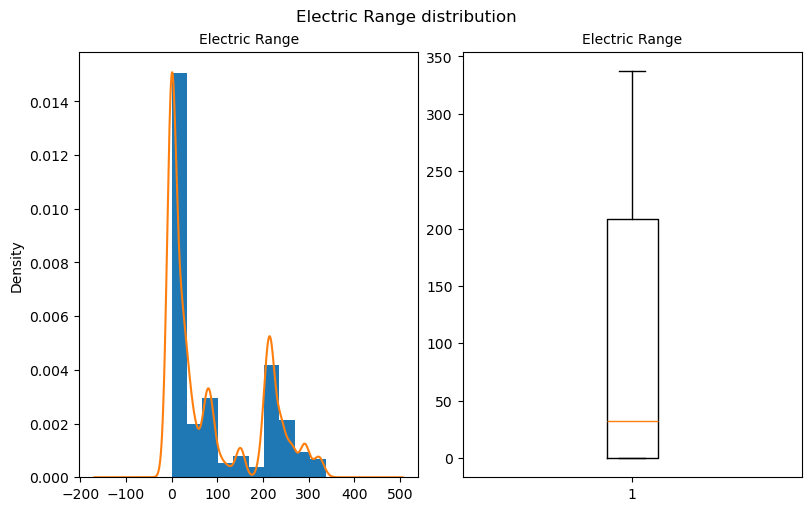

In [225]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
fig.suptitle("Electric Range distribution")

axs[0].hist(df['Electric Range'], density=True)
df['Electric Range'].plot(kind = 'kde', ax = axs[0])
axs[0].set_title("Electric Range", fontsize="medium")

axs[1].boxplot(df['Electric Range'])
axs[1].set_title("Electric Range", fontsize="medium")

plt.show()

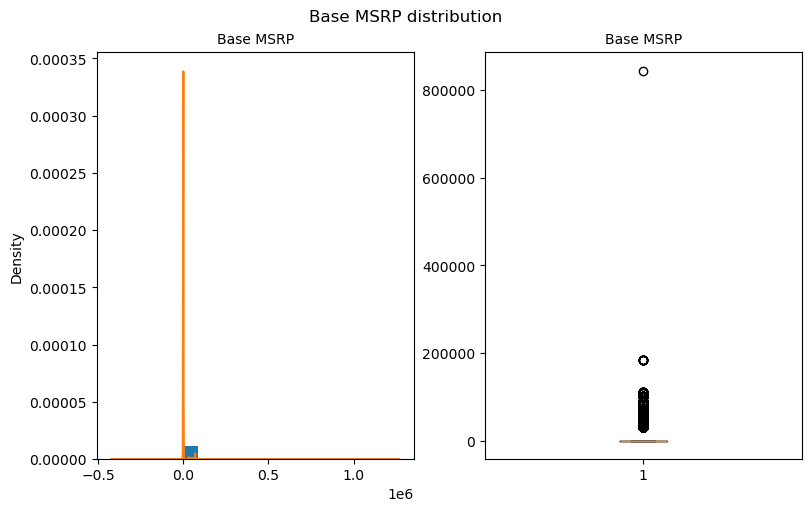

In [226]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
fig.suptitle("Base MSRP distribution")

axs[0].hist(df['Base MSRP'], density=True)
df['Base MSRP'].plot(kind = 'kde', ax = axs[0])
axs[0].set_title("Base MSRP", fontsize="medium")

axs[1].boxplot(df['Base MSRP'])
axs[1].set_title("Base MSRP", fontsize="medium")

plt.show()

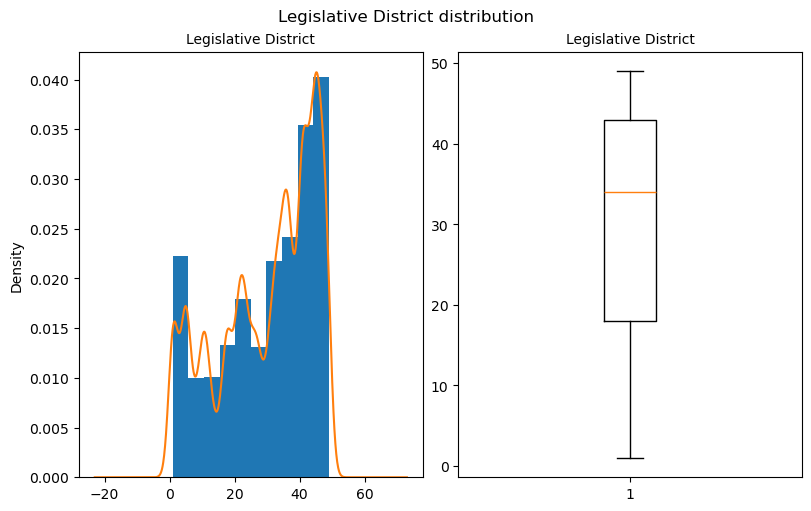

In [227]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
fig.suptitle("Legislative District distribution")

axs[0].hist(df['Legislative District'], density=True)
df['Legislative District'].plot(kind = 'kde', ax = axs[0])
axs[0].set_title("Legislative District", fontsize="medium")

axs[1].boxplot(df['Legislative District'])
axs[1].set_title("Legislative District", fontsize="medium")

plt.show()

## Categorical Analysis

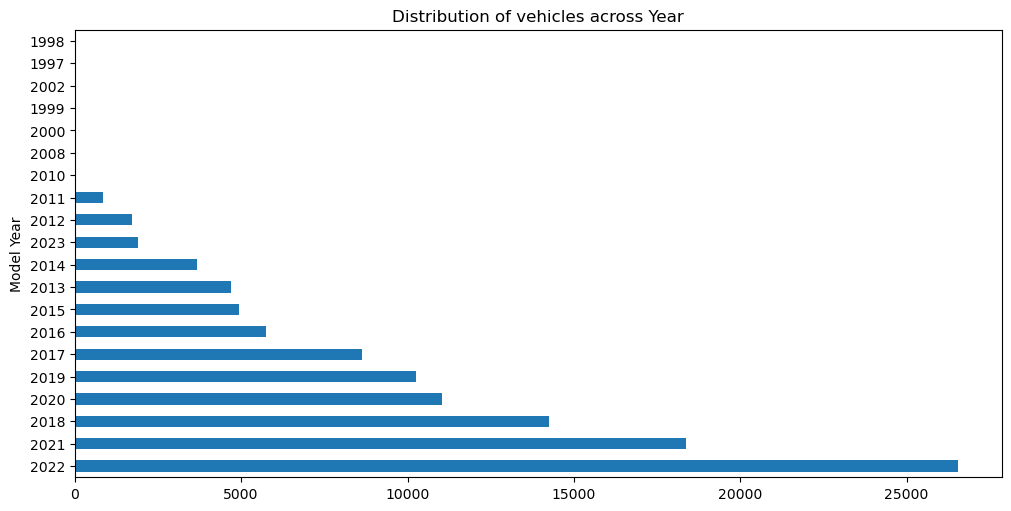

In [229]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Model Year'].value_counts().plot(kind='barh')
plt.title("Distribution of vehicles across Year")
plt.show() 

* Most of the electric vehicles are released in 2019- 2022.

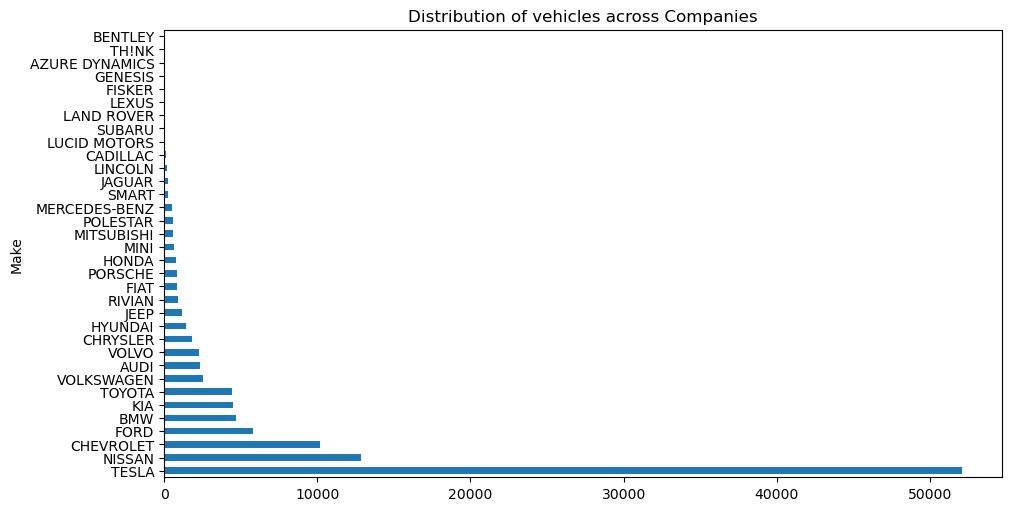

In [231]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Make'].value_counts().plot(kind = 'barh')
plt.title("Distribution of vehicles across Companies")
plt.show() 

* Most of the Electric Vehicles are from car companies like Tesla, Nissan, Chevrolet, Ford.

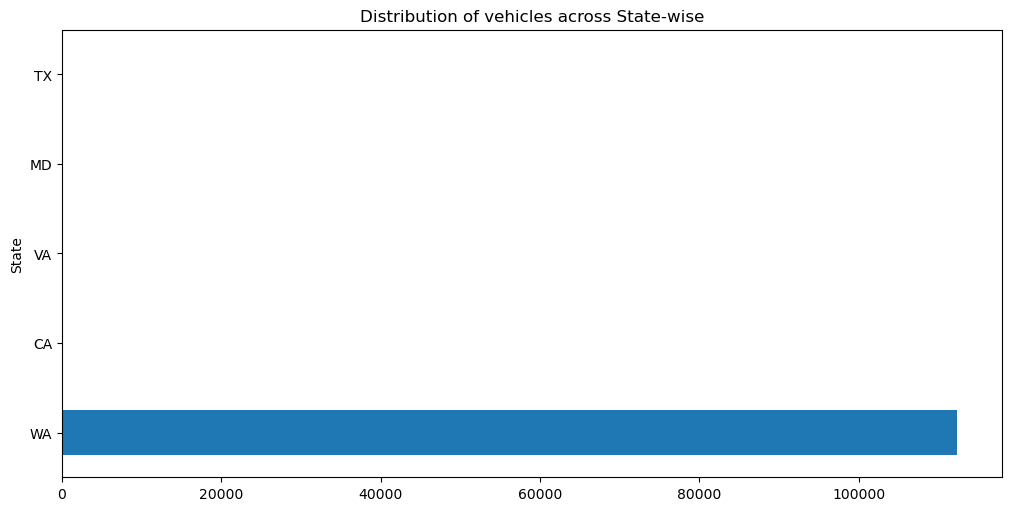

In [233]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['State'].value_counts()[:5].plot(kind = 'barh')
plt.title("Distribution of vehicles across State-wise")
plt.show() 

* Most of the electric vehicles are in Washington state.

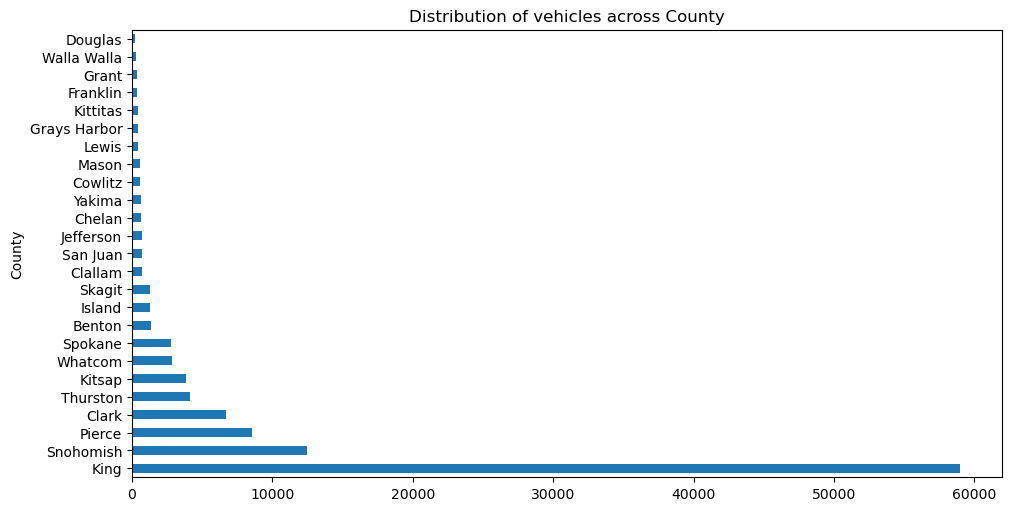

In [235]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['County'].value_counts()[:25].plot(kind = 'barh')
plt.title("Distribution of vehicles across County")
plt.show() 

* Most of the electric vehicles belongs to counties like king, snohomish, pierce.

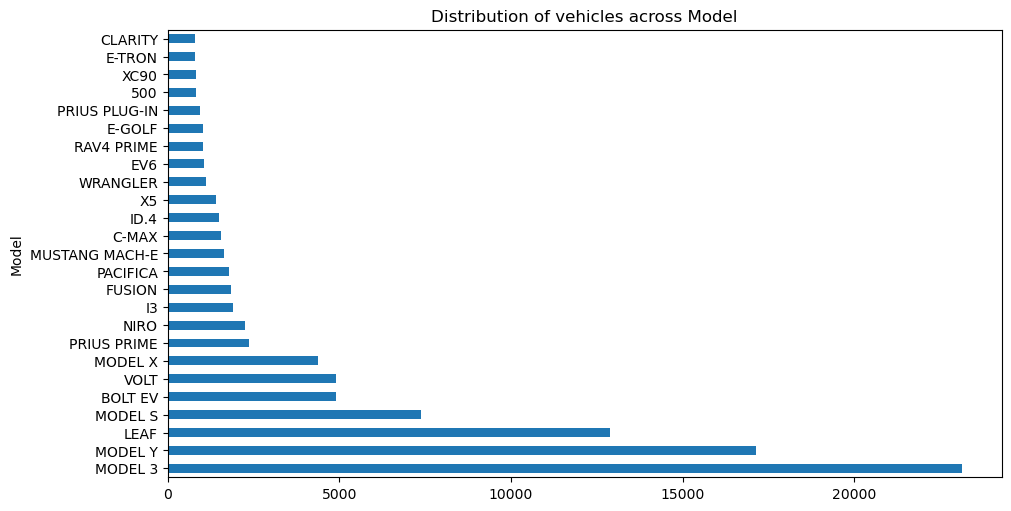

In [237]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Model'].value_counts()[:25].plot(kind = 'barh')
plt.title("Distribution of vehicles across Model")
plt.show() 

* Most of the electric vehicle models are Model3, Modely, Leaf, Models.

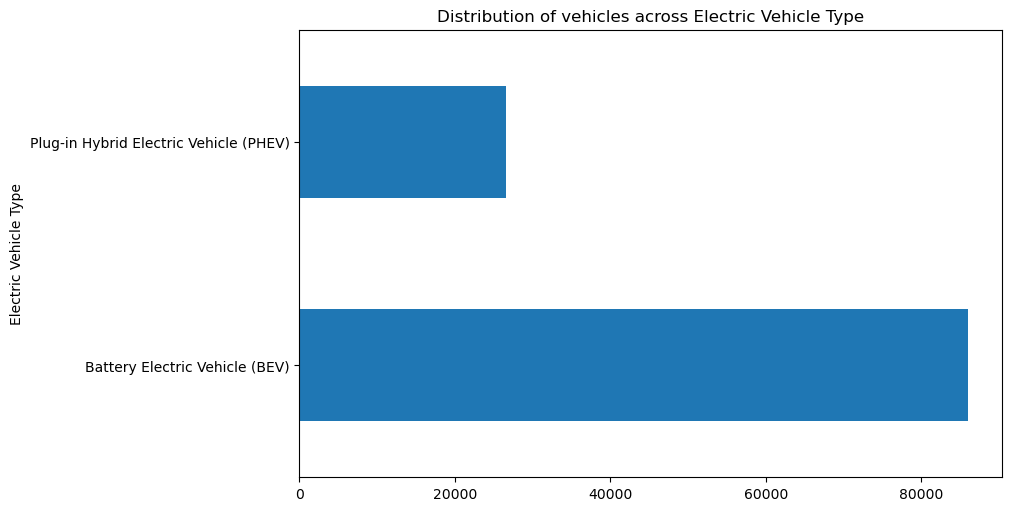

In [239]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Electric Vehicle Type'].value_counts().plot(kind = 'barh')
plt.title("Distribution of vehicles across Electric Vehicle Type")
plt.show() 

* Most of the electric vehicles are Battery based vehicles compared to Hybrid vehicles.

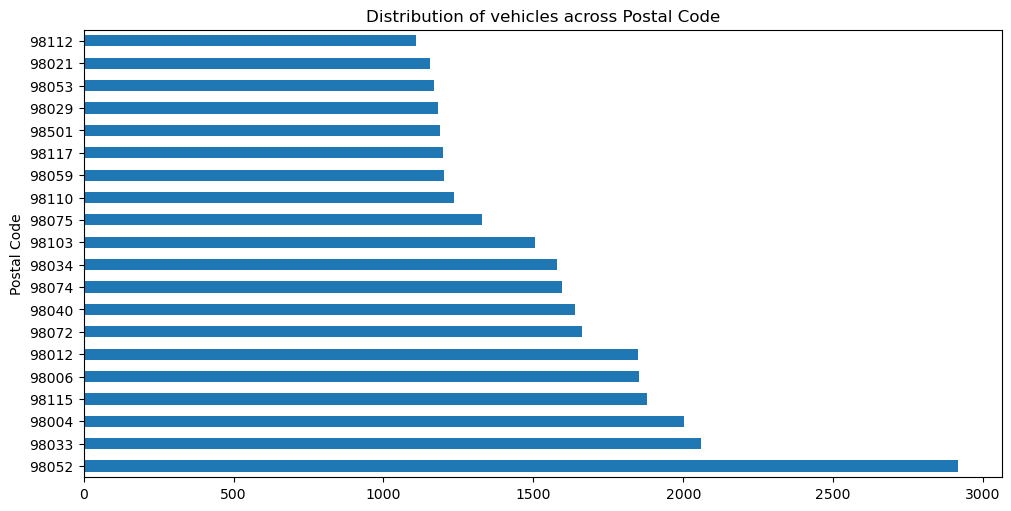

In [241]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Postal Code'].value_counts()[:20].plot(kind = 'barh')
plt.title("Distribution of vehicles across Postal Code")
plt.show() 

* Most of the electric vehicles belongs to postal code of 98052, 98033, 98004, 98115.

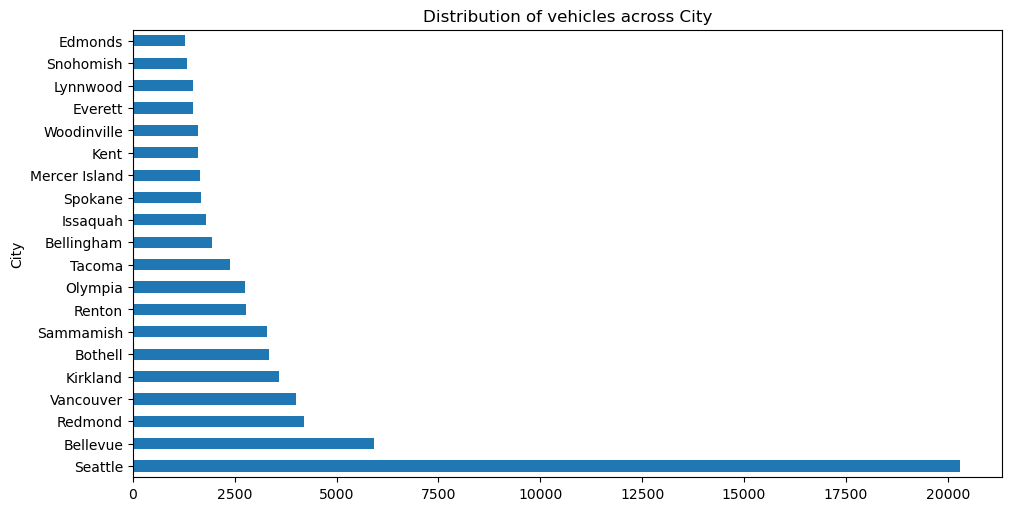

In [243]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['City'].value_counts()[:20].plot(kind = 'barh')
plt.title("Distribution of vehicles across City")
plt.show() 

* Cities like `seattle, Bellevue, Redmound, Vancouver` holds more no of electric vehicles.

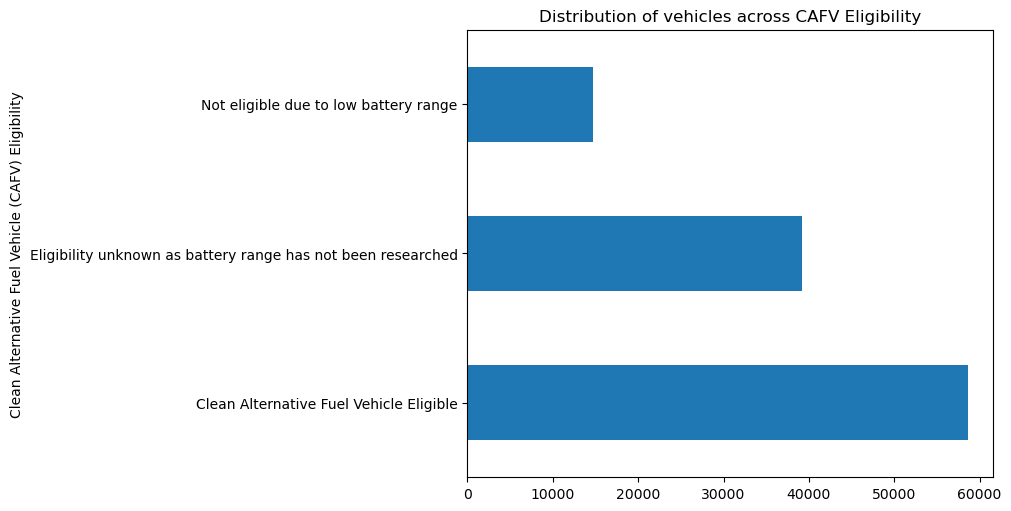

In [245]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind = 'barh')
plt.title("Distribution of vehicles across CAFV Eligibility")
plt.show()

* Most of the electric vehicles are eligible under `CAFV Eligibility` category.

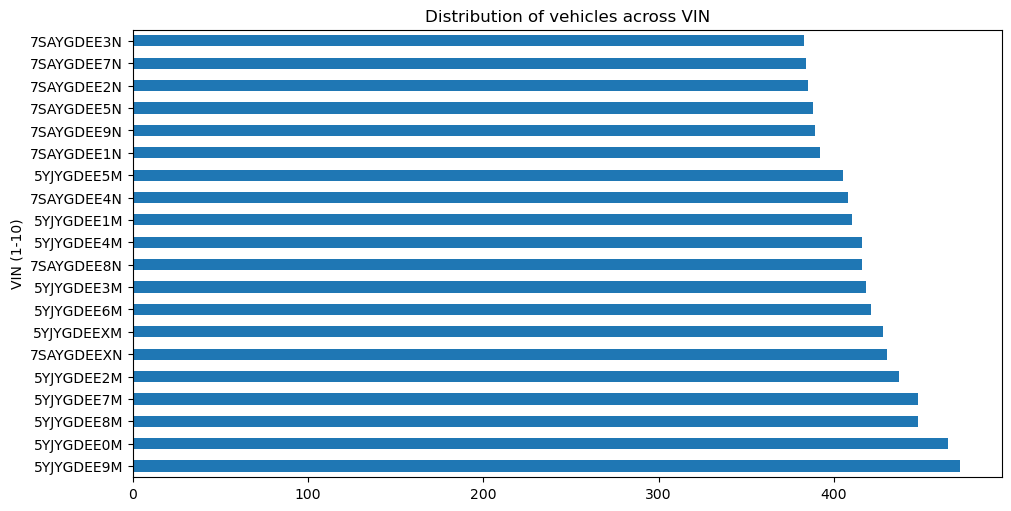

In [247]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['VIN (1-10)'].value_counts()[:20].plot(kind = 'barh')
plt.title("Distribution of vehicles across VIN")
plt.show()

* Most of the Electric vehicles are assembled in  these location `5YJYGDEE9M, 5YJYGDEE0M`.

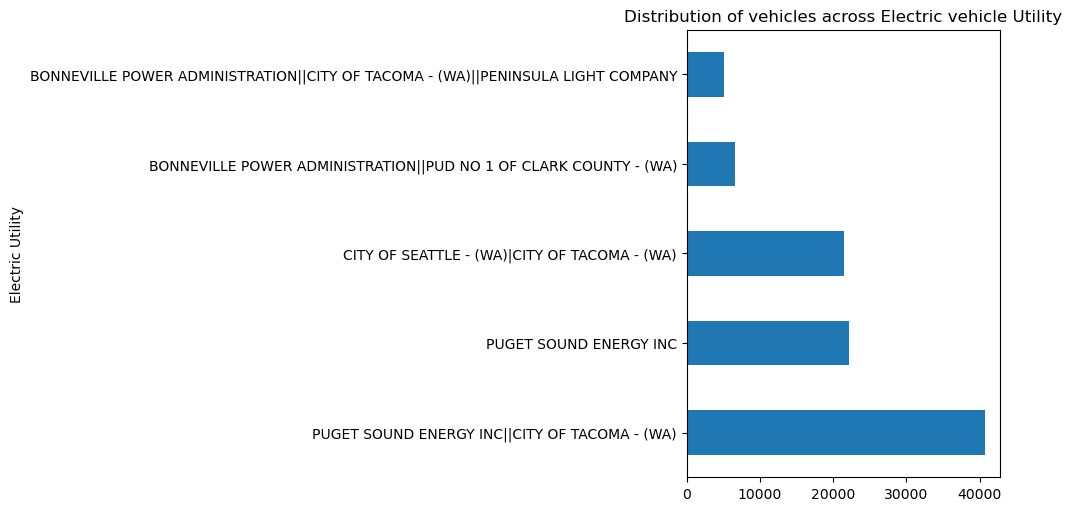

In [249]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df['Electric Utility'].value_counts()[:5].plot(kind = 'barh')
plt.title("Distribution of vehicles across Electric vehicle Utility")
plt.show()

* Most of the electric vehicles are under utility companies of  `PUGET SOUND ENERGY INC, CITY OF TACOMA`.

## Bivariate Analysis - Numerical vs Numerical features

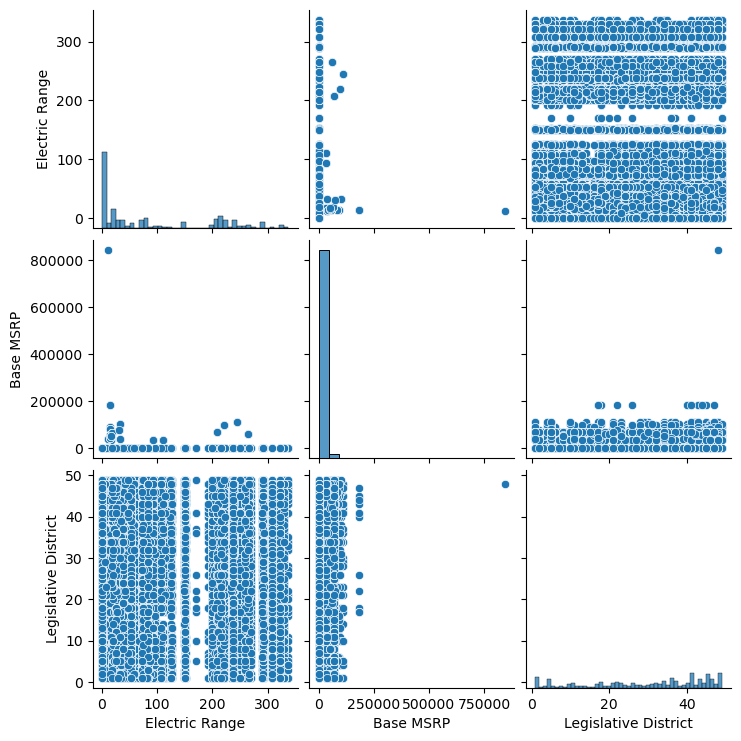

In [252]:
sns.pairplot(df.loc[:, 'Electric Range':'Legislative District']) 

## Categorical vs Numerical features

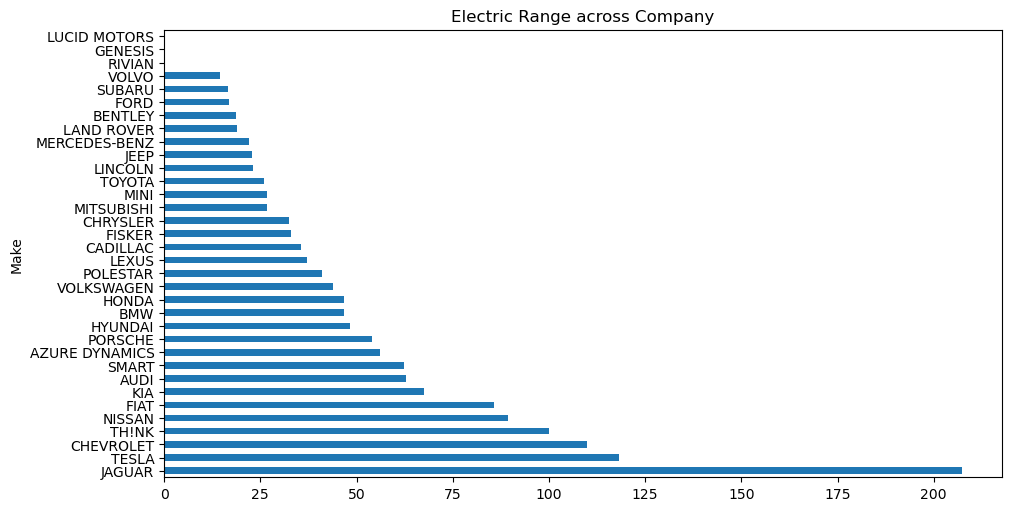

In [254]:
plt.figure(1, figsize=(10, 5), layout = 'constrained')
df.groupby('Make')['Electric Range'].agg('mean').sort_values(ascending = False).plot(kind = 'barh')
plt.title("Electric Range across Company")
plt.show()

* By looking at the plot `Jaguar, Tesla, Chevrolet` are **`Top3`** on average long Electric Range Vehicles.

In [256]:
df.groupby('Electric Vehicle Type')['Electric Range'].agg(['min', 'max', 'median', 'mean'])

,min,max,median,mean
Electric Vehicle Type,,,,
Battery Electric Vehicle (BEV),0,337,76.0,105.369671
Plug-in Hybrid Electric Vehicle (PHEV),6,153,25.0,31.000376


* Battery Electric Vehicle (BEV) have `Elecrtric Range` range between 0 -337, median Electric Range is 76.
* Plug-in Hybrid Electric Vehicle (PHEV) have `Electric Rnage` range between 6 - 153, median is 31.

## Categorical vs Categorical features

<Axes: ylabel='Make'>

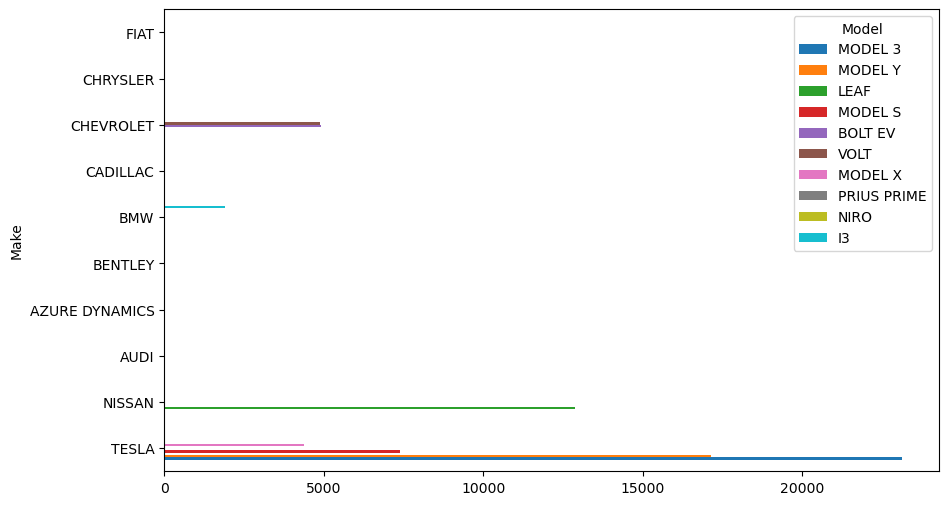

In [259]:
t = pd.crosstab(df['Make'], df['Model'])

top10_models = t.sum().sort_values(ascending=False)[:10].index

t_filtered = t[top10_models].sort_values(by=['MODEL 3', 'MODEL Y', 'LEAF'], ascending=[False, False, False])[:10]

t_filtered.plot(kind='barh', figsize=(10, 6))

* Tesla models are `model 3, model Y, model S`, Nissan is `Leaf`, Chevrolet model is `BOLTEV, VOLT` are more electric vehicles compared to other comapny models.

<Axes: ylabel='Make'>

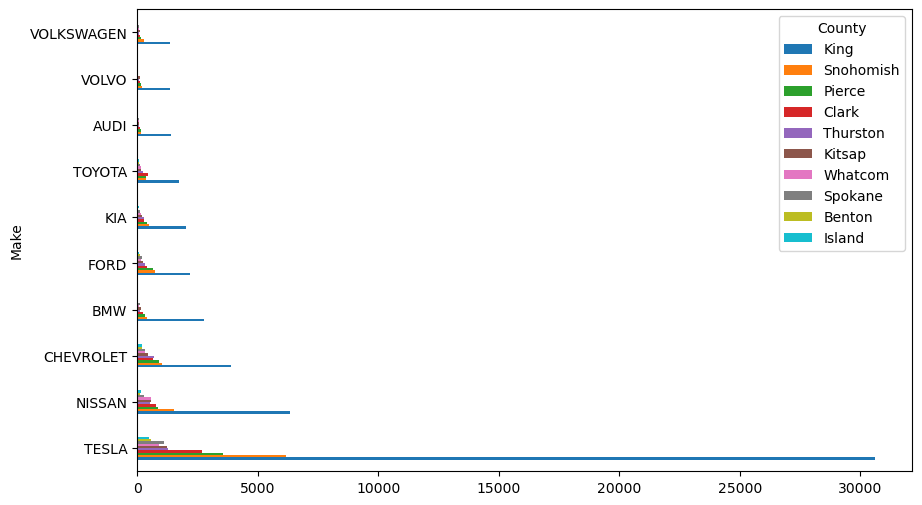

In [261]:
t = pd.crosstab(df['Make'], df['County'])

top10_counties = t.sum().sort_values(ascending=False)[:10].index

t_filtered = t[top10_counties].sort_values(by=['King', 'Snohomish', 'Pierce'], ascending=[False, False, False])[:10]

t_filtered.plot(kind='barh', figsize=(10, 6))

* Most of the `Tesla` cars are from king, snohomish county.
* Car Comapnies like `Tesla, Nissan, Chevrolet, BMW, Ford, KIA` most of these are belonging to `king`county.

<Axes: ylabel='Make'>

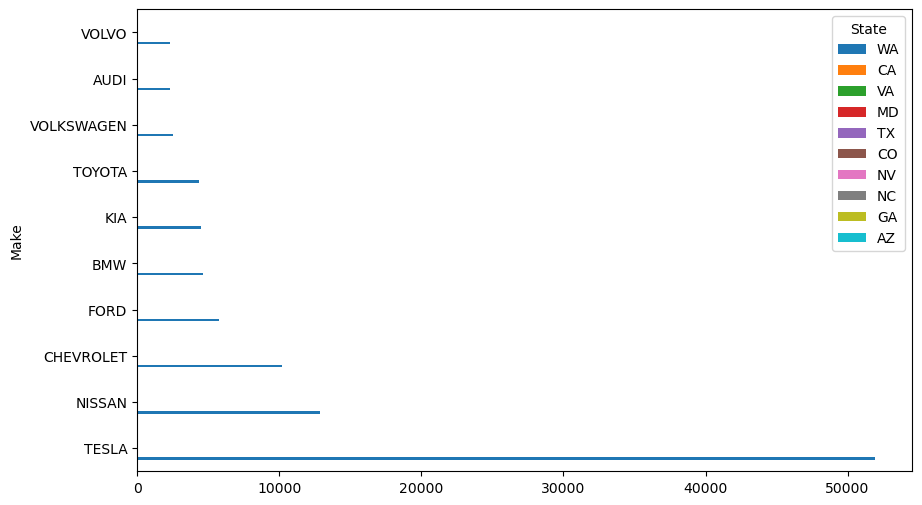

In [263]:
t = pd.crosstab(df['Make'], df['State'])

top10_states = t.sum().sort_values(ascending=False)[:10].index

t_filtered = t[top10_states].sort_values(by=['WA', 'CA', 'VA'], ascending=[False, False, False])[:10]

t_filtered.plot(kind='barh', figsize=(10, 6))

* Most of these cars located in `Washington` state.

In [265]:
states = df['State'].value_counts().reset_index()

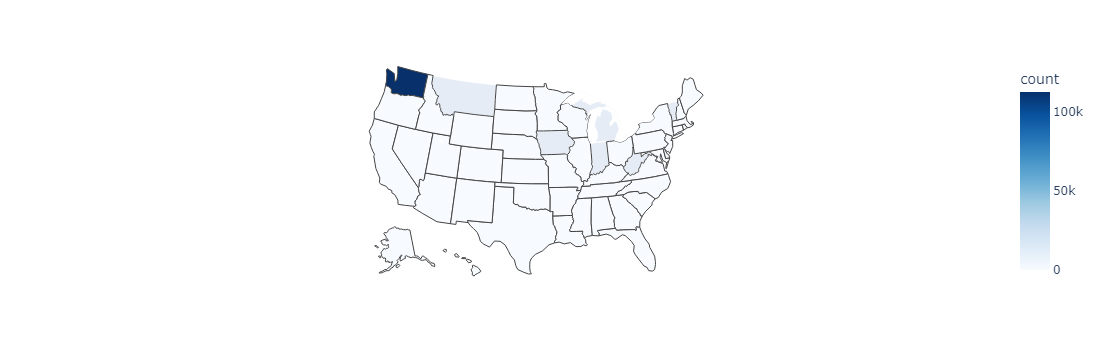

In [266]:
fig = px.choropleth(states,
                    locations='State', 
                    locationmode="USA-states", 
                    color='count',
                    color_continuous_scale= px.colors.sequential.Blues, 
                    scope="usa")

fig.show()

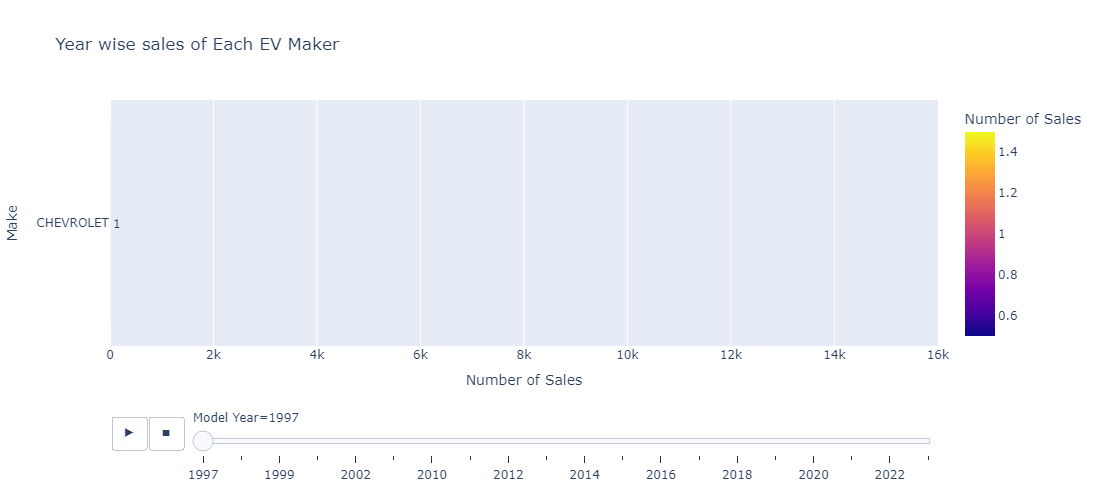

In [267]:
car_counts = df.groupby(['Model Year', 'Make']).size().reset_index(name = 'count')

fig = px.bar(car_counts, x='count', y='Make', color= 'count',text='count',
             animation_frame='Model Year', orientation='h',
             labels={'count': 'Number of Sales', 'year': 'Year'},
             range_x= [0, car_counts['count'].max() * 1.1],
             height= 500,
             title='Year wise sales of Each EV Maker')

fig.show()